In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib

In [2]:
# Load test image
t1_img = nib.load("ct_train/0001_0001_5_1.nii.gz")
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 35 28  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.0488281 0.0488281 0.0625    0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 1.0229965
qoffset_y       : 0.6323717
qoffset_z       : -18.63

In [3]:
# Get image data
t1_data = t1_img.get_fdata()
t1_data.shape

(35, 35, 28)

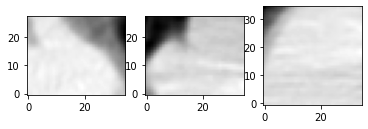

In [4]:
# Plot image
x_slice = t1_data[9, :, :]
y_slice = t1_data[:, 19, :]
z_slice = t1_data[:, :, 2]

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [5]:
# Normalize image data
t1_data = t1_data / np.max(t1_data)
t1_data

array([[[ 0.6992126 ,  0.73700787,  0.76535433, ..., -0.10393701,
         -0.13700787, -0.1511811 ],
        [ 0.77637795,  0.82677165,  0.83622047, ..., -0.0519685 ,
         -0.10866142, -0.15590551],
        [ 0.80944882,  0.83464567,  0.82362205, ..., -0.03937008,
         -0.10393701, -0.15905512],
        ...,
        [-0.25511811, -0.26141732, -0.28818898, ..., -1.32283465,
         -1.32440945, -1.2503937 ],
        [-0.32913386, -0.33070866, -0.37480315, ..., -1.23464567,
         -1.31338583, -1.33228346],
        [-0.49448819, -0.5007874 , -0.57637795, ..., -1.17637795,
         -1.29448819, -1.37795276]],

       [[ 0.71023622,  0.74645669,  0.76535433, ..., -0.11338583,
         -0.13543307, -0.13385827],
        [ 0.76850394,  0.80944882,  0.82834646, ..., -0.04409449,
         -0.08503937, -0.10866142],
        [ 0.79527559,  0.81102362,  0.80944882, ..., -0.00629921,
         -0.05354331, -0.09606299],
        ...,
        [-0.17795276, -0.16535433, -0.17952756, ..., -

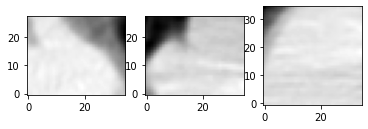

In [6]:
# Plot normalized image
x_slice = t1_data[9, :, :]
y_slice = t1_data[:, 19, :]
z_slice = t1_data[:, :, 2]

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [7]:
# Augmentation functions
def data_transformation(arr: np.ndarray):
    """Augment a 3D array by mirroring and rotating it."""
    # declare result: list of nd.array
    result = [arr]

    # mirror along x axis
    result.append(np.flip(arr, axis=0))

    # mirror along y axis
    result.append(np.flip(arr, axis=1))

    # mirror along z axis
    result.append(np.flip(arr, axis=2))

    # rotate along x axis
    result.append(np.rot90(arr, k=1, axes=(1, 2)))
    result.append(np.rot90(arr, k=2, axes=(1, 2)))
    result.append(np.rot90(arr, k=3, axes=(1, 2)))

    # rotate along y axis
    result.append(np.rot90(arr, k=1, axes=(0, 2)))
    result.append(np.rot90(arr, k=2, axes=(0, 2)))
    result.append(np.rot90(arr, k=3, axes=(0, 2)))

    # rotate along z axis
    result.append(np.rot90(arr, k=1, axes=(0, 1)))
    result.append(np.rot90(arr, k=2, axes=(0, 1)))
    result.append(np.rot90(arr, k=3, axes=(0, 1)))
    
    return result

def add_gaussian(arr: np.ndarray):
    """Add Gaussian noise to a 3D array."""
    return arr + np.random.normal(0, 0.01, arr.shape)

def augment_data(arr: np.ndarray):
    """Augment a 3D array by mirroring and rotating it and adding Gaussian noise."""
    l = data_transformation(arr)
    return l + [add_gaussian(i) for i in l]

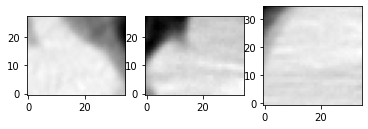

In [8]:
# Plot image after gaussian noise
t1_gaussian = add_gaussian(t1_data)
x_slice = t1_gaussian[9, :, :]
y_slice = t1_gaussian[:, 19, :]
z_slice = t1_gaussian[:, :, 2]

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")


In [9]:
# Augmentation coefficient
augmented_list = augment_data(t1_data)
print(len(augmented_list))

26


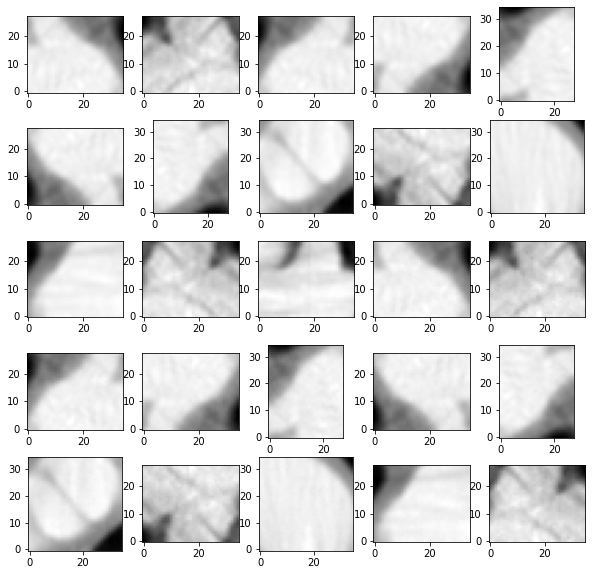

In [10]:
# Test the augmentation function, plot all results 5 at a time
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < len(augmented_list):
        ax.imshow(augmented_list[i][9, :, :].T, cmap="gray", origin="lower")
    else:
        ax.axis("off")